## Project: Data Exploration of the performance of globally-selected 15/16-year-old students in Mathematics, Reading and Science Literacy, based on the results of the PISA 2012 test

### **_by Sebastian Sbirna_**

***

## Table of Contents
- [Introduction of the topic and dataset](#intro)
- [Dataset Investigation and preliminary wrangling](#dataset_investigation)
- [Further Data Wrangling](#further_wrangling)
- [Univariate Exploration and Analysis](#univariate)
- [Bivariate Exploration and Analysis](#bivariate)
- [Multivariate Exploration and Analysis](#multivariate)
- [Conclusions and answers](#conclusions)

<a id='intro'></a>
## Introduction of the topic and dataset

### Introduction to PISA *(ref.: NCES 2014-024, U.S. Department of Education)*

#### What Is PISA? 

The Program for International Student Assessment (PISA) is a system of international assessments that allows countries to compare outcomes of learning as students near the end of compulsory schooling. PISA core assessments measure the performance of 15-year-old students in mathematics, science, and reading literacy every 3 years. Coordinated by the Organization for Economic Cooperation and Development (OECD), PISA was first implemented in 2000 in 32 countries. It has since grown to 65 education systems in 2012. 

#### What PISA Measures 

PISA’s goal is to assess students’ preparation for the challenges of life as young adults. PISA assesses the application of knowledge in mathematics, science, and reading literacy to problems within a reallife context (OECD 1999). PISA does not focus explicitly on curricular outcomes and uses the term “literacy” in each subject area to indicate its broad focus on the application of knowledge and skills. For example, when assessing mathematics, PISA examines how well 15-year-old students can understand, use, and reflect on mathematics for a variety of real-life problems and settings that they may not encounter in the classroom. Scores on the PISA scales represent skill levels along a continuum of literacy skills. 

Each PISA data collection cycle assesses one of the three core subject areas in depth (considered the major subject area), although all three core subjects are assessed in each cycle (the other two subjects are considered minor subject areas for that assessment year). Assessing all three subjects every 3 years allows countries to have a consistent source of achievement data in each of the three subjects, while rotating one area as the primary focus over the years. Mathematics was the major subject area in 2012, as it was in 2003, since each subject is a major subject area once every three cycles. In 2012, mathematics, science, and reading literacy were assessed primarily through a paper-and-pencil assessment, and problem solving was administered via a computer-based assessment. In addition to these core assessments, education systems could participate in optional paper-based financial literacy and computer-based mathematics and reading assessments. The United States participated in these optional assessments. Visit www.nces.ed.gov/surveys/pisa for more information on the PISA assessments, including information on how the assessments were designed and examples of PISA questions. 

### Introduction to the PISA 2012 dataset

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

***

<a id='dataset_investigation'></a>
## Dataset Investigation and Preliminary Wrangling

Since the dataset provided has _636_ variables (according to its specified data dictionary), we will begin our exploration by wrangling the data accordingly, in order to better understand which variables might be worth delving into.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

sb.set()

# We are interested in exploring the formatting of all columns (variables), hence we will display all of them
pd.set_option('display.max_rows', 636)
pd.set_option('display.max_columns', 636)

In [2]:
df = pd.read_csv('pisa2012b.csv', encoding='latin-1', low_memory = False)

In [3]:
df.head(3)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,ST88Q03,ST88Q04,ST89Q02,ST89Q03,ST89Q04,ST89Q05,ST91Q01,ST91Q02,ST91Q03,ST91Q04,ST91Q05,ST91Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST94Q05,ST94Q06,ST94Q09,ST94Q10,ST94Q14,ST96Q01,ST96Q02,ST96Q03,ST96Q05,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC01Q09,IC01Q10,IC01Q11,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC02Q06,IC02Q07,IC03Q01,IC04Q01,IC05Q01,IC06Q01,IC07Q01,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC08Q06,IC08Q07,IC08Q08,IC08Q09,IC08Q11,IC09Q01,IC09Q02,IC09Q03,IC09Q04,IC09Q05,IC09Q06,IC09Q07,IC10Q01,IC10Q02,IC10Q03,IC10Q04,IC10Q05,IC10Q06,IC10Q07,IC10Q08,IC10Q09,IC11Q01,IC11Q02,IC11Q03,IC11Q04,IC11Q05,IC11Q06,IC11Q07,IC22Q01,IC22Q02,IC22Q04,IC22Q06,IC22Q07,IC22Q08,EC01Q01,EC02Q01,EC03Q01,EC03Q02,EC03Q03,EC03Q04,EC03Q05,EC03Q06,EC03Q07,EC03Q08,EC03Q09,EC03Q10,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,EC05Q01,EC06Q01,EC07Q01,EC07Q02,EC07Q03,EC07Q04,EC07Q05,EC08Q01,EC08Q02,EC08Q03,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUD

As we can see above, the data is clearly very abundant, with a large number of variables to take into consideration.

*After looking throughout the Dataset Dictionary to find out what each of these columns represents, a number of leads to be explored have been considered:*

* **_We are interested in finding out how students from individual countries perform in Math, Reading and Science literacy._** 
    * _For that, we will check the average world and country-wide distribution of Math, Reading and Science literacy scores, individually._
    
    
* **_Considering that we can see the countries' average literacy patters in different subjects, we are also curious about from which countries do the "geniuses" stem, meaning which countries have students with exceptionally high literacy scores._**
    * _For that, we will check the distrbution of exceptional scores in Math, Reading and Science literacy, grouped by country._
    
    
* **_Lastly, we would like to find out whether students whose parents have different cultural backgrounds will report any changes in average scores, compared with students raised in a homogenous family background._**
    * _For that, we will compare the distribution of mean scores in each subject across both students with homogenous family background (parents born in same country) and students with heterogenous family background (parents born in two different countries)._

In [4]:
df = df[['CNT', 'ST03Q02', 'ST04Q01', 'AGE', 'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 
         'PV3READ', 'PV4READ', 'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'COBN_F', 'COBN_M', 'COBN_S']]

In [5]:
df.head()

,CNT,ST03Q02,ST04Q01,AGE,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,COBN_F,COBN_M,COBN_S
0,Albania,1996,Female,16.17,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,Albania,Albania,Albania
1,Albania,1996,Female,16.17,486.1427,464.3325,453.4273,472.9008,476.0165,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,Albania,Albania,Albania
2,Albania,1996,Female,15.58,533.2684,481.0796,489.6479,490.4269,533.2684,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,Albania,Albania,Albania
3,Albania,1996,Female,15.67,412.2215,498.6836,415.3373,466.7472,454.2842,547.3630,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573,Albania,Albania,Albania
4,Albania,1996,Female,15.50,381.9209,328.1742,403.7311,418.5309,395.1628,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746,Albania,Albania,Albania


Here, we have only kept variables that may aid in the exploration of our desired leads. 

Before we begin visualizing the data, further wrangling needs to be done in order to ensure clarily of information when working with the dataset.

***

<a id='further_wrangling'></a>
## Further Data Wrangling

In [6]:
# Replace NaN age values with the mean age of students in the dataset
df.loc[np.isfinite(df['AGE']) == False, 'AGE'] = df['AGE'].mean()

In [7]:
# Replace NaN or 'Invalid' values for father/mother birth country to 'Missing', 
# which is already being used to represent missing information

df.loc[df['COBN_F'].isna() == True, 'COBN_F'] = 'Missing'
df.loc[df['COBN_M'].isna() == True, 'COBN_M'] = 'Missing'
df.loc[df['COBN_S'].isna() == True, 'COBN_S'] = 'Missing'

df.loc[df['COBN_F'] == 'Invalid', 'COBN_F'] = 'Missing'
df.loc[df['COBN_M'] == 'Invalid', 'COBN_M'] = 'Missing'
df.loc[df['COBN_S'] == 'Invalid', 'COBN_S'] = 'Missing'

In [8]:
# Check if there are any columns which still have unwrangled NA values
# If this function prints a column, it will also show the total number of NA values in the column, otherwise nothing will print
# The ideal case is that this function does not print anything, meaning there are no more NA values in our working dataset

for column in df.columns:
    if (df[column].isna().sum() > 0):
        print((column) + '  ' + str(df[column].isna().sum()))

Within the dataset, for each literacy subject, there are 5 plausible scores of performance recorded for a student. We will compute the actual score of the student by taking the average of the 5 plausible scores, as performed below:

In [9]:
# Compute the average of plausible scores determines the PISA score of a student in a particular subject

df['Math Score'] = (df['PV1MATH'] + df['PV2MATH'] + df['PV3MATH'] + df['PV4MATH'] + df['PV5MATH']) / 5
df['Reading Score'] = (df['PV1READ'] + df['PV2READ'] + df['PV3READ'] + df['PV4READ'] + df['PV5READ']) / 5
df['Science Score'] = (df['PV1SCIE'] + df['PV2SCIE'] + df['PV3SCIE'] + df['PV4SCIE'] + df['PV5SCIE']) / 5

Since we will work only with the mean of scores from now on, the plausible scores used to make up the mean are no longer needed, therefore they will be dropped.

In [10]:
# Drop any further-unnecessary columns

df.drop(columns = ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 
                   'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], inplace = True)

We now need to name our variables in a more descriptive manner than initially provided. We will decipher the meaning of the initial variable names using, once again, the data dictionary of the PISA 2012 test.

In [11]:
# Rename columns appropriately

df.rename({'CNT' : 'Country', 'ST03Q02' : 'Birth year', 'ST04Q01' : 'Gender', 'AGE' : 'Age', 'COBN_F' : 'Birth Country Father', 
           'COBN_M' : 'Birth Country Mother', 'COBN_S' : 'Birth Country Child'}, axis = 'columns', inplace = True)

Since we need to find out whether a student comes from a homogenous or heterogenous family background, we will perform feature engineering to create a variable which tells us this information.

In [12]:
df['Parents - Same Cultural Background'] = (df['Birth Country Father'] == df['Birth Country Mother'])

In [13]:
df.loc[df['Parents - Same Cultural Background'] == True, 'Parents - Same Cultural Background'] = 'Same'
df.loc[df['Parents - Same Cultural Background'] == False, 'Parents - Same Cultural Background'] = 'Different'

###### The final form of the wrangled working dataset looks as seen below:

In [14]:
df.head()

,Country,Birth year,Gender,Age,Birth Country Father,Birth Country Mother,Birth Country Child,Math Score,Reading Score,Science Score,Parents - Same Cultural Background
0,Albania,1996,Female,16.17,Albania,Albania,Albania,366.18634,261.01424,371.91348,Same
1,Albania,1996,Female,16.17,Albania,Albania,Albania,470.56396,384.68832,478.12382,Same
2,Albania,1996,Female,15.58,Albania,Albania,Albania,505.53824,405.18154,486.60946,Same
3,Albania,1996,Female,15.67,Albania,Albania,Albania,449.45476,477.46376,453.97240,Same
4,Albania,1996,Female,15.50,Albania,Albania,Albania,385.50398,256.01010,367.15778,Same


In [15]:
df.shape

(485490, 11)

***

<a id='univariate'></a>
## Univariate Exploration and Analysis

*In this section, we will investigate the distributions of individual variables.*

### Visualisation 1

First, we are interested in seeing what is the distribution of PISA scores for each subject in part, along with their type of distribution and mode values. Also, for us to determine what "exceptionally high" scores represent, we first need to understand what is common to happen within the data and between what intervals do most score values lie.

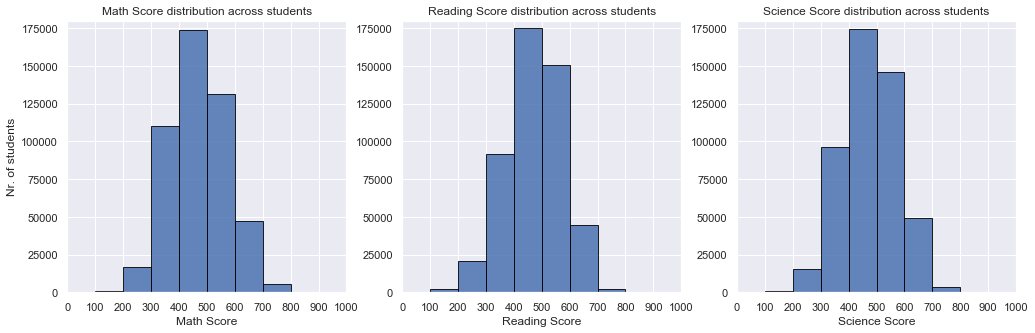

In [16]:
plt.figure(figsize = [17, 5])

bins_hist = np.arange(0, 1000 + 1, 100)

plt.subplot(1, 3, 1)
plt.hist(df['Math Score'], bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Math Score');
plt.ylabel('Nr. of students')
plt.title("Math Score distribution across students");

plt.subplot(1, 3, 2)
plt.hist(df['Reading Score'], bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Reading Score');
plt.title("Reading Score distribution across students");

plt.subplot(1, 3, 3)
plt.hist(df['Science Score'], bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Science Score');
plt.title("Science Score distribution across students");

From the above distributions, we find out that:

* _The literacy scores are spread out in a clear, smooth unimodal distribution of values_


* _The vast majority of the students are scoring in each subject between 300 and 600 points, while a small portion of the total number achieves poorer (between 100 and 300 points) or greater (between 600 and 800 points) test performance_


* _For each of these three score distributions, most students fitted within the interval of scores between 400 and 500 points, which happens to also be the middle interval of the possible score range. This shows that the PISA 2012 test has been constructed in a balanced manner with respect to student reviewing methodology and the difficulty of its questions_
***

### Visualisation 2

Next, we are interested in finding out about which countries host "exceptionally performing" students, and what their number is, with respect to each country and subject.

_Since we have found out that a distribution of scores between 100 and 800 points is large enough to be noticed in our histogram of score count distributions, we understand that "exceptionally high" scores will be valued above 800 points._

In [17]:
# Retrieve entries of students with scores above 800 points in each subject

high_math_score = df[df['Math Score'] > 800]['Country'].value_counts()
high_reading_score = df[df['Reading Score'] > 800]['Country'].value_counts()
high_science_score = df[df['Science Score'] > 800]['Country'].value_counts()

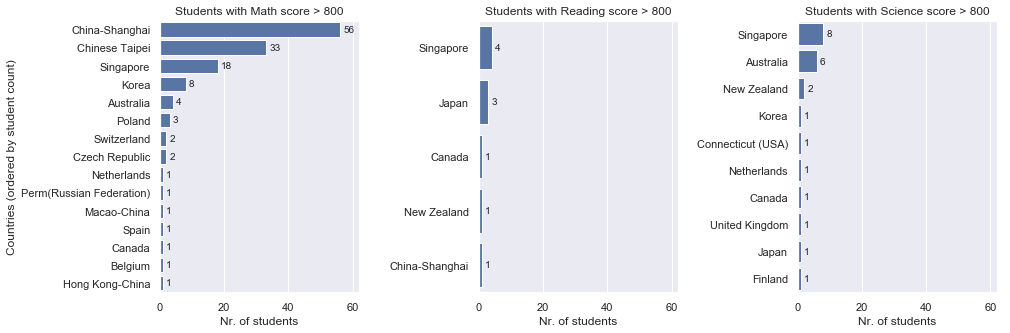

In [18]:
plt.figure(figsize = [15, 5])
plt.subplots_adjust(wspace = 0.6) # adjust spacing between subplots, in order to show long country names nicely
x_lim_max = high_math_score.values[0] + 6 # '+6' is done in order to show the text counts properly next to the bars


plt.subplot(1, 3, 1)
sb.barplot(y = high_math_score.index, x = high_math_score.values, color = sb.color_palette()[0])
plt.title('Students with Math score > 800');
plt.xlabel('Nr. of students')
plt.ylabel('Countries (ordered by student count)')

# Write the total number of students with exceptionally high scores in each country, right after the horizontal count bar
indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = high_math_score[label.get_text()] + 1, s = high_math_score[label.get_text()], va = 'center')
plt.xlim(0, x_lim_max);    


plt.subplot(1, 3, 2)
sb.barplot(y = high_reading_score.index, x = high_reading_score.values, color = sb.color_palette()[0])
plt.xlim(0, x_lim_max);
plt.title('Students with Reading score > 800');
plt.xlabel('Nr. of students')

# Write the total number of students with exceptionally high scores in each country, right after the horizontal count bar
indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = high_reading_score[label.get_text()] + 1, s = high_reading_score[label.get_text()], va = 'center')
plt.xlim(0, x_lim_max);    


plt.subplot(1, 3, 3)
sb.barplot(y = high_science_score.index, x = high_science_score.values, color = sb.color_palette()[0])
plt.xlim(0, x_lim_max);
plt.title('Students with Science score > 800');
plt.xlabel('Nr. of students')

# Write the total number of students with exceptionally high scores in each country, right after the horizontal count bar
indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = high_science_score[label.get_text()] + 1, s = high_science_score[label.get_text()], va = 'center')
plt.xlim(0, x_lim_max);

Here, we have counted the total number of exceptional students for each subject, and from their count distributions, we find out that:

* _Oceania and Asian countries, in particular China and Singapore, seem to be the places where exceptional students are most likely to stem from_


* _Singapore is the clear leader in excellency, since it manages to reach within the top 3 countries with most exceptional students in all three areas of study_


* _Korea and Australia also have a respectable number of excellent students in both Math and Science_


* _Besides Asia and Oceania, a number of European and North American countries also make the podium: Canada is present in all three of the above distributions, while Poland, Czech Republic and Switzerland appear to be educating Math-bright students_

***

### Visualisation 3

Lastly, we would like to find out whether students with heterogenous family roots provide different score readings, on average, than students raised by parents with a homogenous family background.

For that, we would first like to see the proportion of students having parents with same or different cultural background:  

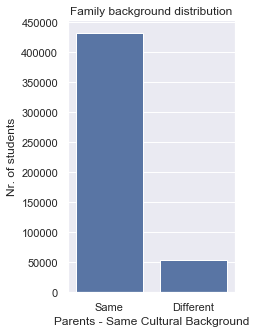

In [19]:
plt.figure(figsize=[3, 5]);
sb.countplot(x = 'Parents - Same Cultural Background', data = df, color = sb.color_palette()[0]);

y_ticks = np.arange(0, 450000 + 1, 50000)
plt.yticks(y_ticks, y_ticks);
plt.ylabel("Nr. of students");
plt.title('Family background distribution');

From this previous distribution, we discover that there are almost **_9 times_** more students having parents with same cultural background than those having parents with different backgrounds.

***

<a id='bivariate'></a>
## Bivariate Exploration and Analysis

*In this section, we will investigate the relationships between pairs of relevant variables in our data.*

### Visualisation 4

After finding out previously the global distribution of scores for each literacy category in part, we are interested to look into the relationship how the country of residence/education affects scores on each of the subjects individually.

Also, we have previously discovered countries where exceptional students stem from, such as China, Singapore, Korea or Poland. 

Was this just a strong deviation from the norm of scores within these countries, or are these countries also between the top leaders when it comes to educating all of their students in these subjects?

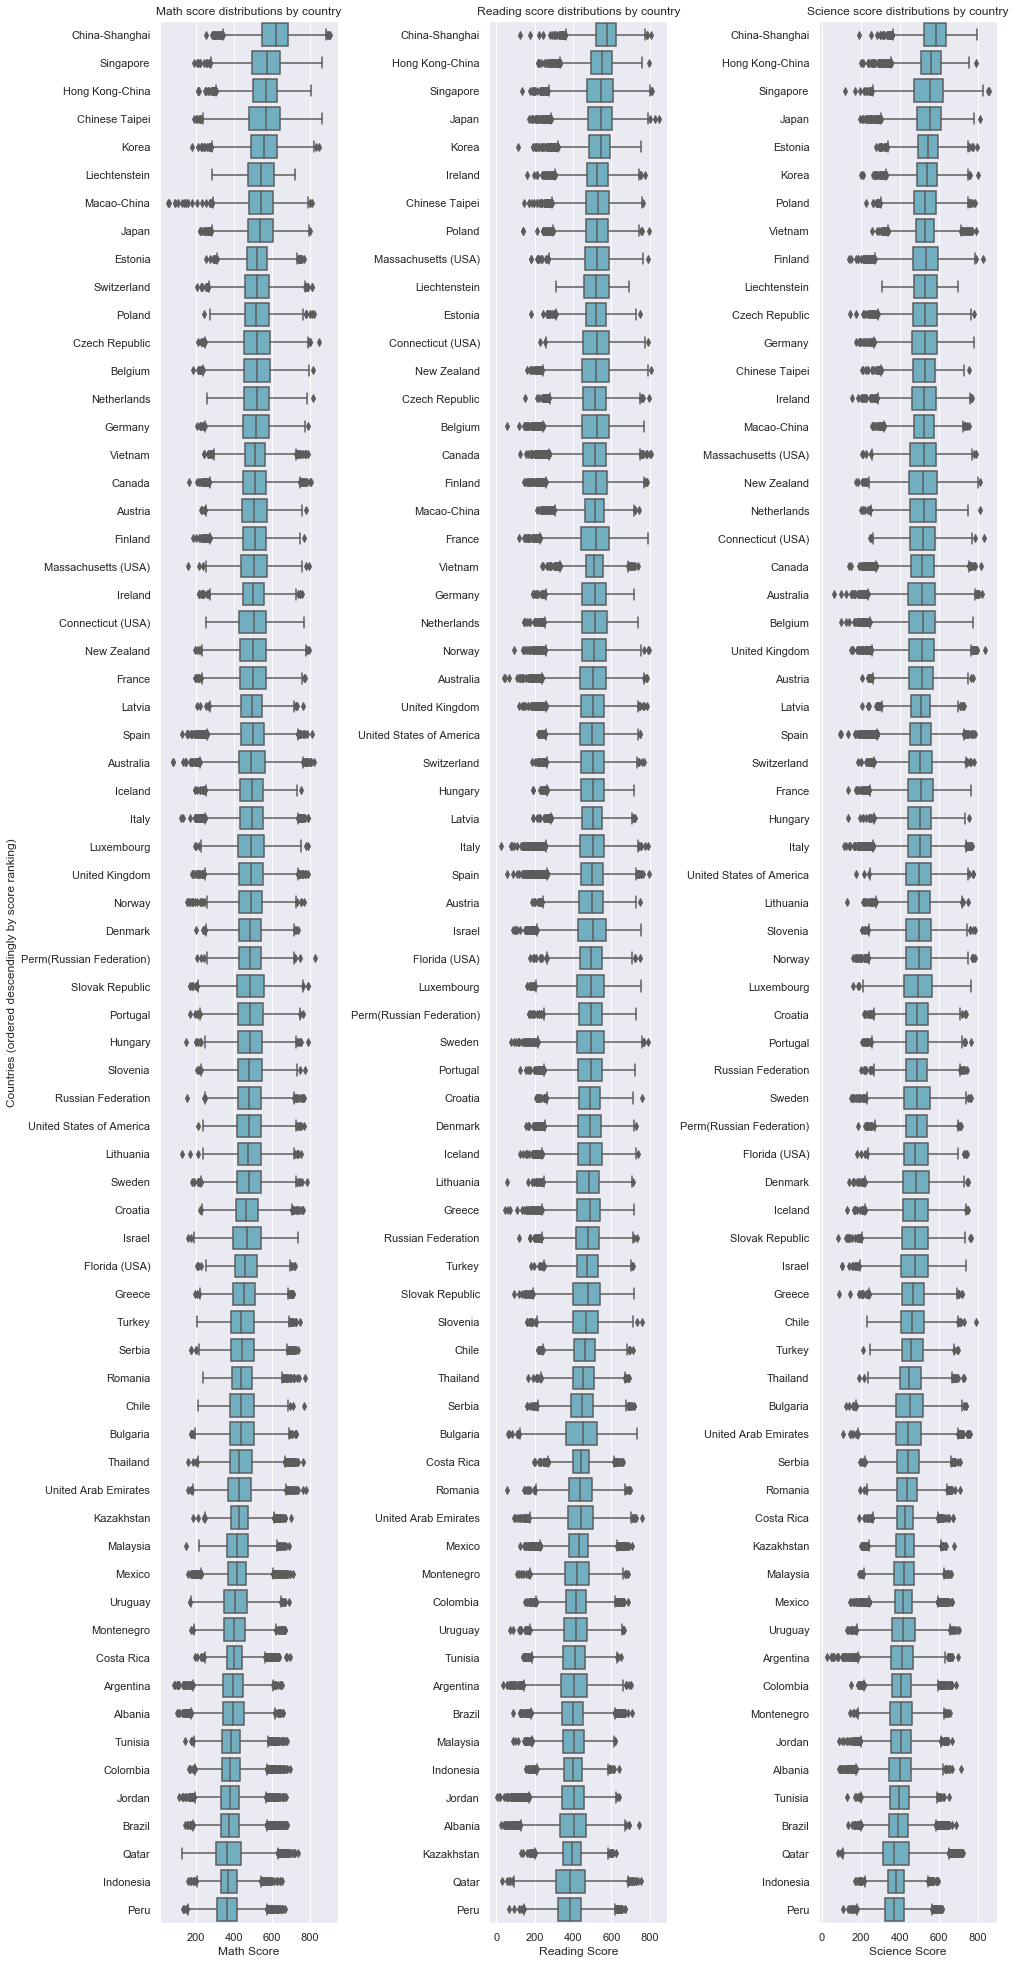

In [20]:
plt.figure(figsize = [15, 35])
plt.subplots_adjust(wspace = 0.85) # adjust spacing between subplots, in order to show long country names nicely

math_score_country_order = df.groupby('Country')['Math Score'].mean().sort_values(ascending = False).index
reading_score_country_order = df.groupby('Country')['Reading Score'].mean().sort_values(ascending = False).index
science_score_country_order = df.groupby('Country')['Science Score'].mean().sort_values(ascending = False).index

plt.subplot(1, 3, 1)
sb.boxplot(x = df['Math Score'], y = df['Country'], order = math_score_country_order, color = sb.color_palette()[9]);
plt.ylabel('Countries (ordered descendingly by score ranking)')
plt.title('Math score distributions by country');

plt.subplot(1, 3, 2)
sb.boxplot(x = df['Reading Score'], y = df['Country'], order = reading_score_country_order, color = sb.color_palette()[9]);
plt.ylabel(''); # Remove the redundant label
plt.title('Reading score distributions by country');

plt.subplot(1, 3, 3)
sb.boxplot(x = df['Science Score'], y = df['Country'], order = science_score_country_order, color = sb.color_palette()[9]);
plt.ylabel(''); # Remove the redundant label
plt.title('Science score distributions by country');

Here we have, in decreasing order, the rankings of countries with the best-performing students, on average, for each of the three subjects. We find that:
* _Most countries seem to achieve, in different subjects, rankings which are close to each other, with 80% of countries reaching rankings within 10 places higher/lower across all the subjects. The remaining 20% of countries with large deviations will be analyzed further on, as we would like to find out in what subjects are they deviating and how large is the difference_


* _From the top ranking of countries, we can clearly see that it was no coincidence that exceptional students come from Asian countries, in particular China and Singapore, as these are the countries which are 1st, 2nd or 3rd place across all subjects. Another country which impressed was Poland, with 3 exceptional students in Mathematics. Here, it can be seen that this is no coincidence either, as Poland occupies a spot in the top 10 placements in Reading and Science, and 11th in Mathematics_


* _The box-and-wiskers plot allows us to see the outliers in scores for each country in part. For example, we find out that, even though a number of Singapore's students managed to achieve outstanding results in the field of Mathematics, that is not to be considered "out of ordinary" (or, with other words, as outliers) in the country's perspective, however the outstanding results received in Science can be indeed considered to be slightly out of regular bounds, since we can notice the Singapore's outliers in the plot_


* _Other such findings can be performed by picking a country of interest and checking its score distribution, rankings and outlier distribution accordingly_

***

### Visualisation 5

Further on, we are interested to see if there are any countries which had multi-talented students, performing exceptionally (score > 800) in not only one discipline, but in multiple ones at the same time.

In [21]:
high_math_and_reading_score = df[(df['Math Score'] >= 800) & (df['Reading Score'] >= 800)]['Country'].value_counts()
high_math_and_science_score = df[(df['Math Score'] >= 800) & (df['Science Score'] >= 800)]['Country'].value_counts()
high_reading_and_science_score = df[(df['Reading Score'] >= 800) & (df['Science Score'] >= 800)]['Country'].value_counts()

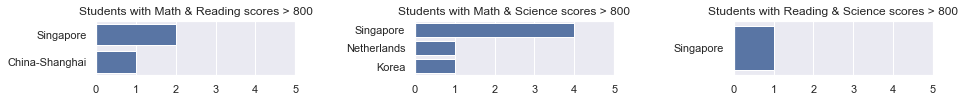

In [22]:
plt.figure(figsize = [15, 1])
plt.subplots_adjust(wspace = 0.6) # adjust spacing between subplots, in order to show long country names nicely
x_lim_max = high_math_and_science_score.values[0] # adjust the proportions of the x-axis with respect to all 3 plots using this

plt.subplot(1, 3, 1)
sb.barplot(y = high_math_and_reading_score.index, x = high_math_and_reading_score.values, color = sb.color_palette()[0])
plt.title('Students with Math & Reading scores > 800');
plt.xticks(np.arange(0, x_lim_max + 2, 1));

plt.subplot(1, 3, 2)
sb.barplot(y = high_math_and_science_score.index, x = high_math_and_science_score.values, color = sb.color_palette()[0])
plt.title('Students with Math & Science scores > 800');
plt.xticks(np.arange(0, x_lim_max + 2, 1));

plt.subplot(1, 3, 3)
sb.barplot(y = high_reading_and_science_score.index, x = high_reading_and_science_score.values, color = sb.color_palette()[0])
plt.title('Students with Reading & Science scores > 800');
plt.xticks(np.arange(0, x_lim_max + 2, 1));

We have once again realized plots to visualize the distribution of counted students with exceptional results in multiple fields. It can be found that:

* _Singapore leads in the world ranking of multi-talented outstanding results, being the only one country present in all three possible combination of two talents. Coupled together with previous findings of Singapore's on-average and above-average student results, we can determine that its country is world-leader in providing multidisciplinary high-quality education, across all measured disciplines._


* _China is once again present in the rankings, together with (South) Korea, determining that, as said about Singapore, such countries have a very high quality of education in the measured fields. The connection between all previous visualizations of scores determine that such outstanding results are not simple coincidence, but only slightly-higher than average results compared with these countries' mean of scores._


* _There were no students who have managed to reach scores above 800 in all three subjects simultaneously, which is why there is no further visualization on this matter._

***

### Visualisation 6

Lastly, we are investigating whether students having parents from different cultural (country) backgrounds are performing differently than students whose parents come from the same type of background.

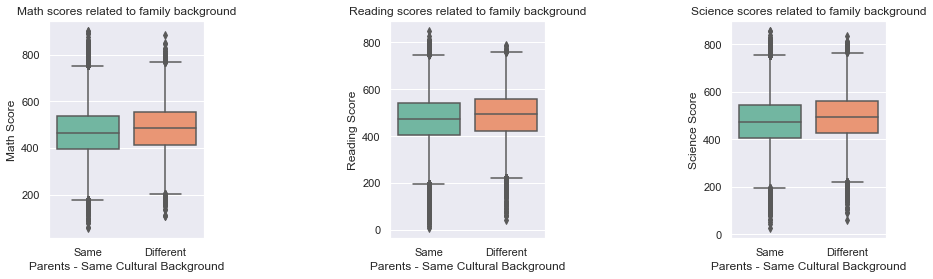

In [23]:
plt.figure(figsize = [15, 4])
plt.subplots_adjust(wspace = 1.2)

plt.subplot(1, 3, 1)
sb.boxplot(x = df['Parents - Same Cultural Background'], y = df['Math Score'], palette = 'Set2')
plt.title('Math scores related to family background');

plt.subplot(1, 3, 2)
sb.boxplot(x = df['Parents - Same Cultural Background'], y = df['Reading Score'], palette = 'Set2')
plt.title('Reading scores related to family background');

plt.subplot(1, 3, 3)
sb.boxplot(x = df['Parents - Same Cultural Background'], y = df['Science Score'], palette = 'Set2');
plt.title('Science scores related to family background');

_It can be seen that, on average, indeed students coming from heterogenic family backgrounds report increased performance in all areas, compared to students from homogenous family backgrounds._

***

<a id='multivariate'></a>
## Multivariate Exploration and Analysis

*In this section, we will investigate the relationships between the interactions of three or more variables at the same time.*

### Visualisation 7

Out of curiosity, we would like to know whether it is normal that most countries who had many students scoring high in one of the subjects, also had, on average, students scoring high on the other two subjects.

Therefore, we are going to study the pair-by-pair relationship between Math Scores, Reading Scores and Science Scores, and correlate them in pair scatter plots, in order to see what type and strength of correlation exists.

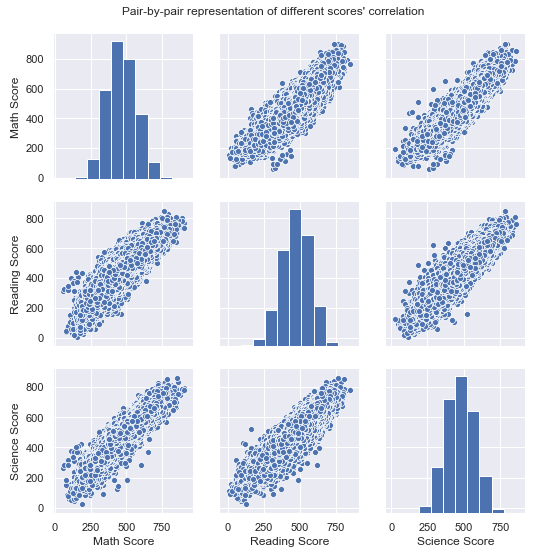

In [24]:
grid = sb.pairplot(data = df, vars=["Math Score", "Reading Score", "Science Score"]);
grid.fig.suptitle("Pair-by-pair representation of different scores' correlation", y = 1.02);

_As it could be expected, there is a very strong and positive correlation between any pair of the three variables representing the scores of the three subjects. Therefore, the previous relationships between scores observed in the behaviour of many countries' students is justified._

***

### Visualisation 8

Lastly in this analysis, even though we found out that positive correlation of students' scores is normal behaviour for a country, and that most countries display similar rankings in scores across all three subjects, there are still 20% of countries who deviate from this behaviour, where these countries have differences in rankings of some scores of more than 10 places.

We will look into who are those countries, and where do the differences take place in the scores of each of these countries.

In [25]:
country_outliers = []

for country in df['Country'].unique():
    if ((np.abs((math_score_country_order.get_loc(country) - reading_score_country_order.get_loc(country))) > 10) |\
        (np.abs((math_score_country_order.get_loc(country) - science_score_country_order.get_loc(country))) > 10) |\
        (np.abs((reading_score_country_order.get_loc(country) - science_score_country_order.get_loc(country))) > 10)):
        
        country_outliers.append(country)
        
        
country_outliers.sort() # Sort countries alphabetically

for country in country_outliers:
    print((country) + ':' + str((len('United States of America:') - len(country) + 1) * ' ') + 'Math place: ' + str(math_score_country_order.get_loc(country)) + str((5 - len(str(math_score_country_order.get_loc(country))) + 1) * ' ') + 'Reading place: ' + str(reading_score_country_order.get_loc(country)) + str((5 - len(str(reading_score_country_order.get_loc(country))) + 1) * ' ') + 'Science place: ' + str(science_score_country_order.get_loc(country)))

Austria:                   Math place: 17    Reading place: 31    Science place: 23
Florida (USA):             Math place: 44    Reading place: 33    Science place: 40
Iceland:                   Math place: 27    Reading place: 40    Science place: 42
Ireland:                   Math place: 20    Reading place: 5     Science place: 13
Israel:                    Math place: 43    Reading place: 32    Science place: 44
Kazakhstan:                Math place: 53    Reading place: 65    Science place: 54
Macao-China:               Math place: 6     Reading place: 17    Science place: 14
Massachusetts (USA):       Math place: 19    Reading place: 8     Science place: 15
Norway:                    Math place: 31    Reading place: 22    Science place: 33
Slovak Republic:           Math place: 34    Reading place: 45    Science place: 43
Slovenia:                  Math place: 37    Reading place: 46    Science place: 32
Switzerland:               Math place: 9     Reading place: 26    Science pl

In [26]:
df_country_outliers = df[['Country', 'Math Score', 'Reading Score', 'Science Score']][df['Country'].isin(country_outliers)]
df_country_outliers = df_country_outliers.melt('Country', var_name = 'Score Type', value_name = 'Scores')

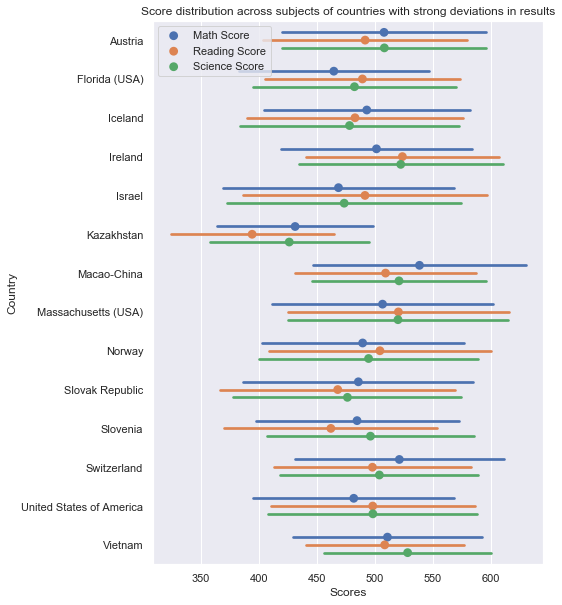

In [27]:
plt.figure(figsize = [7, 10])

sb.pointplot(x = 'Scores', y = 'Country', hue = 'Score Type', data = df_country_outliers, linestyles = '', dodge = 0.4, ci = 'sd', palette = 'deep', order = country_outliers);
plt.legend(loc = 2);
plt.title('Score distribution across subjects of countries with strong deviations in results');

_From this visualization, we can better understand the deviations in the outlier-countries' score pattern. For example, we find out that Kazakhstan is deviating due to much weaker scores in Reading than in the other two disciplines; while Switzerland is deviating through much higher scores in Mathematics than in the other two subjects. For any country of interest, such an analysis can be performed._

***

<a id='conclusions'></a>
## Conclusions and answers

Lastly, we will restate our three questions of interest, along with a summary of our conclusions:

* **_How do students from individual countries perform in Math, Reading and Science literacy?_** 
    * _We have found the literacy trends for each country in part, along with countries with high deviations in scores compared to the norm. The results can be explored in Visualisation 4 and 8._
    
    
* **_What are the countries from which "geniuses" stem, meaning which countries have students with exceptionally high literacy scores?_**
    * _Generally, we have seen Asian countries as being the world leaders at educating students who perform exceptionally, not only in each different subject individually, but also at multiple subjects simultaneously. Singapore and China are examples of this._
    
    
* **_Do students whose parents have different cultural backgrounds report any changes in average scores, compared with students raised in a homogenous family background?_**
    * _We have discovered that students whose parents are from two different cultural backgrounds report, on average, slightly higher performance (scores) in all three measured subjects._